# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
Unit_Type="metric"
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid={weather_api_key}&units={Unit_Type}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url).json()
    try:

        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tangalle
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | akureyri
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | sanguesa/zangoza
City not found. Skipping...
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | raja
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | oualidia
City not found. Skipping...
Processing Record 13 of Set 1 | remire-montjoly
Processing Record 14 of Set 1 | acarau
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | krasnogorskoye
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | oppdal
Processing Record 20 of Set 1 | bethel
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tangalle,6.0240,80.7911,24.94,89,13,4.60,LK,1690498907
1,castillos,-34.1667,-53.8333,8.46,78,86,1.78,UY,1690498592
2,akureyri,65.6835,-18.0878,9.96,81,75,4.63,IS,1690499157
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690499157
4,tiksi,71.6872,128.8694,9.42,60,37,3.20,RU,1690499158


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tangalle,6.0240,80.7911,24.94,89,13,4.60,LK,1690498907
1,castillos,-34.1667,-53.8333,8.46,78,86,1.78,UY,1690498592
2,akureyri,65.6835,-18.0878,9.96,81,75,4.63,IS,1690499157
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690499157
4,tiksi,71.6872,128.8694,9.42,60,37,3.20,RU,1690499158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

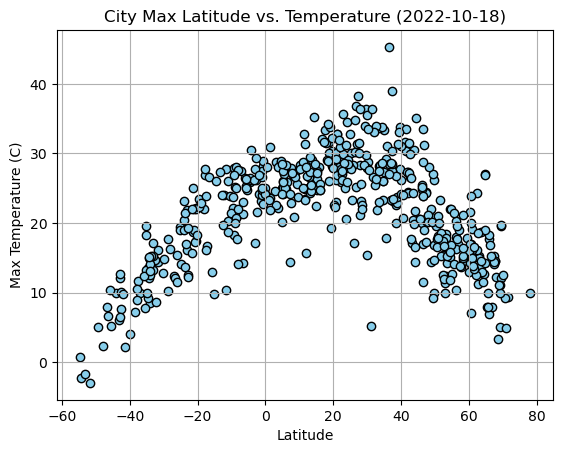

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (True)

# Save the figure
plt.savefig("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

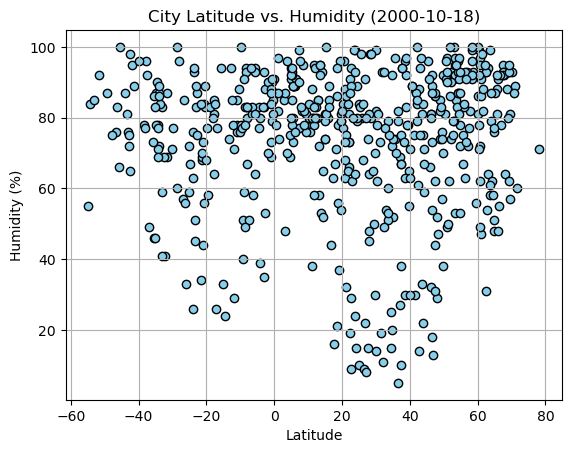

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2000-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)

# Save the figure
plt.savefig("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

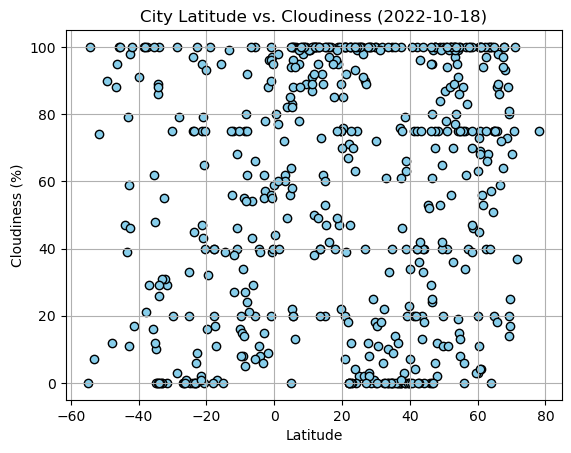

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)

# Save the figure
plt.savefig("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

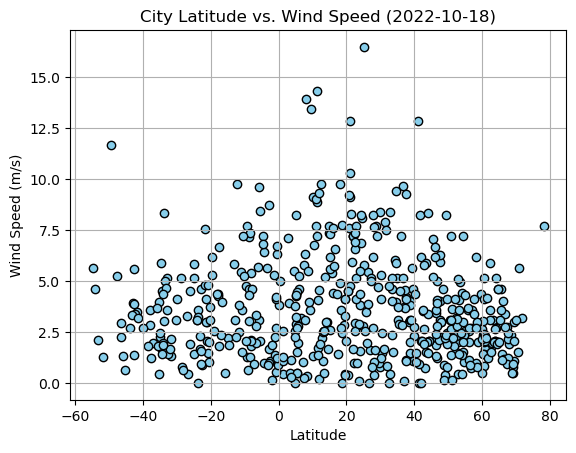

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (True)

# Save the figure
plt.savefig("C:/Users/tsegi/OneDrive/Desktop/Python_API_data/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, ylim=None): 
  (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
  
# Get regression values (regression equation)
  regress_values = x_values * slope + intercept
    
# Create line equation string
  #line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
 # Generate plots - scatter, plot line, title, labels    
  fig1, ax1 = plt.subplots(figsize=(12,8))
  plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
  plt.plot(x_values,regress_values,"r-")
  plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 15)
  plt.xlabel(x_label,fontsize=14)
  plt.ylabel(y_label,fontsize=14)
  #plt.text(line_eq, fontsize=12, color='red', ha='left', va='bottom')
    
# Print r square value
  print(f"The r-squared is: {rvalue**2}")
  correlation = pearsonr(x_values,y_values)
  print(f"The correlation between both factors is {round(correlation[0],2)}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tangalle,6.0240,80.7911,24.94,89,13,4.60,LK,1690498907
2,akureyri,65.6835,-18.0878,9.96,81,75,4.63,IS,1690499157
4,tiksi,71.6872,128.8694,9.42,60,37,3.20,RU,1690499158
5,ribeira grande,38.5167,-28.7000,22.65,96,79,4.02,PT,1690499159
6,raja,8.4596,25.6780,20.85,95,98,0.34,SS,1690499159


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castillos,-34.1667,-53.8333,8.46,78,86,1.78,UY,1690498592
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690499157
7,blackmans bay,-43.0167,147.3167,12.07,76,79,3.93,AU,1690499159
10,acarau,-2.8856,-40.1200,26.23,83,15,8.72,BR,1690498593
17,margaret river,-33.9500,115.0667,13.82,72,100,8.31,AU,1690499163


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4279783013896106
The correlation between both factors is -0.65


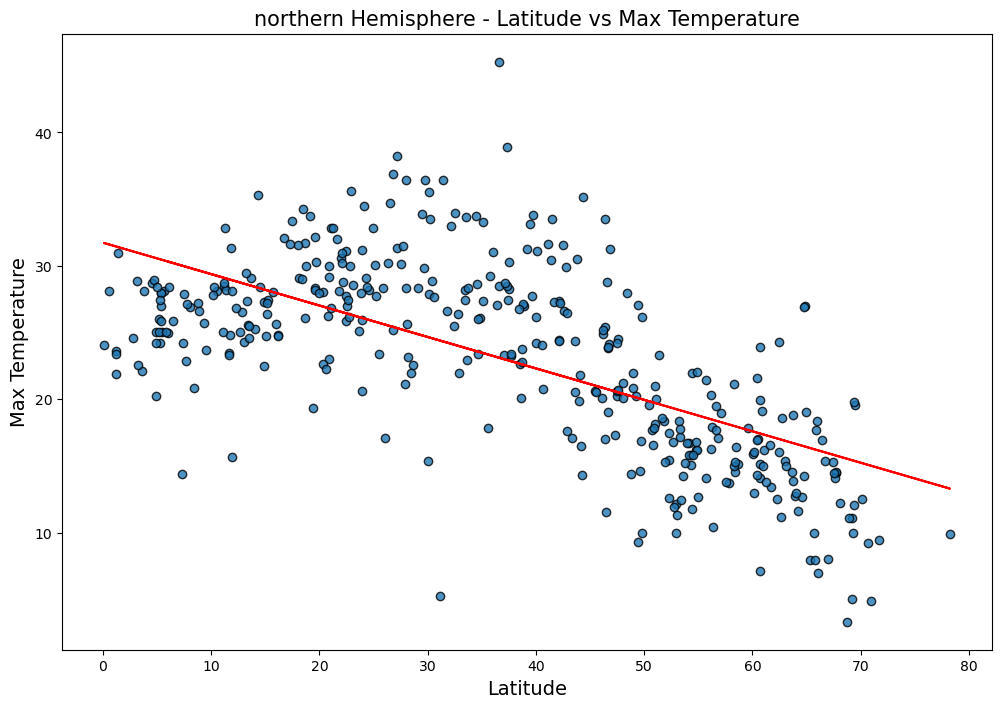

In [21]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], x_label="Latitude", y_label="Max Temperature", hemisphere = "northern")

The r-squared is: 0.7386439220542712
The correlation between both factors is 0.86


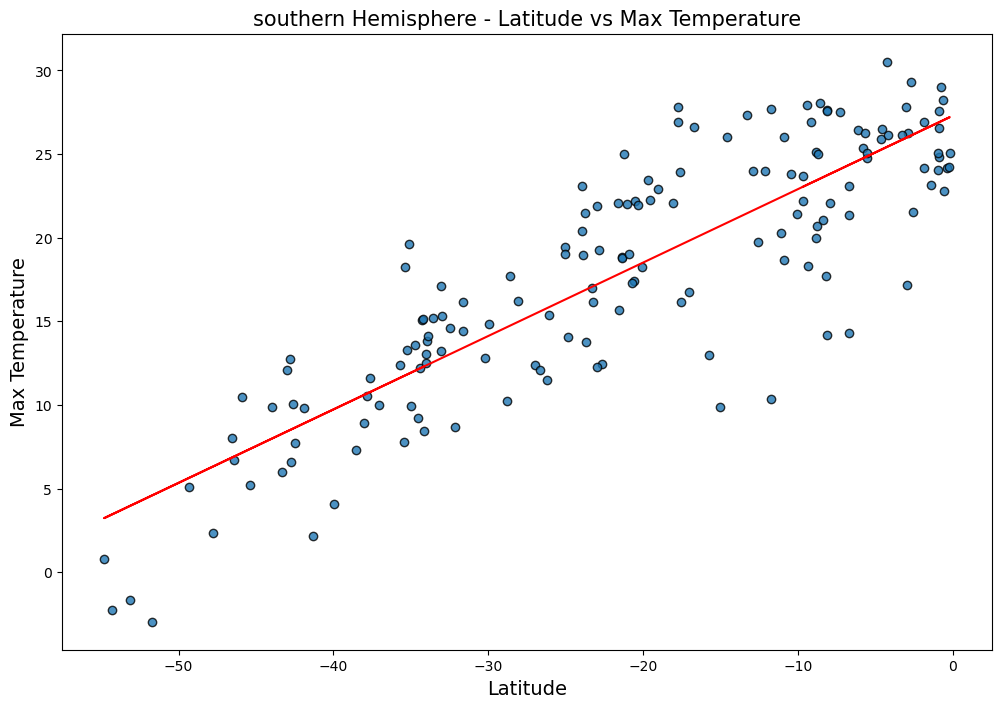

In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], x_label="Latitude", y_label="Max Temperature", hemisphere = "southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The data show strong positive linear relationship between latitudes and temprature in the Southern hemisphere,
while there is a strong negative linear relationship between latitudes and temprature in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0014657511291095609
The correlation between both factors is 0.04


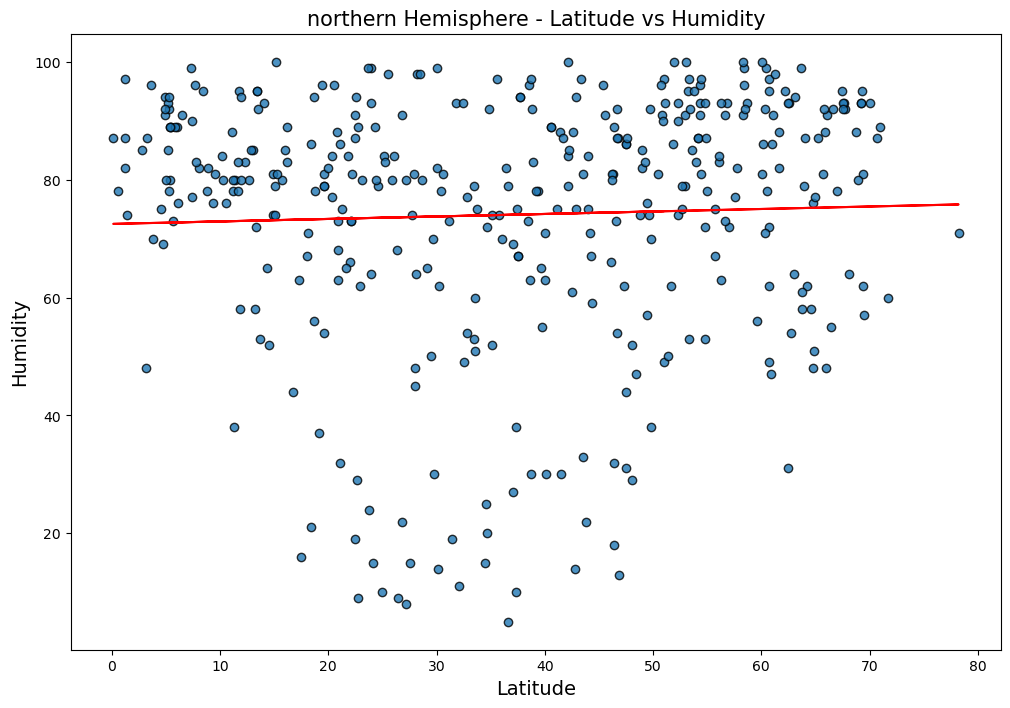

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], x_label="Latitude", y_label="Humidity", hemisphere = "northern")

The r-squared is: 0.0004196410309576244
The correlation between both factors is -0.02


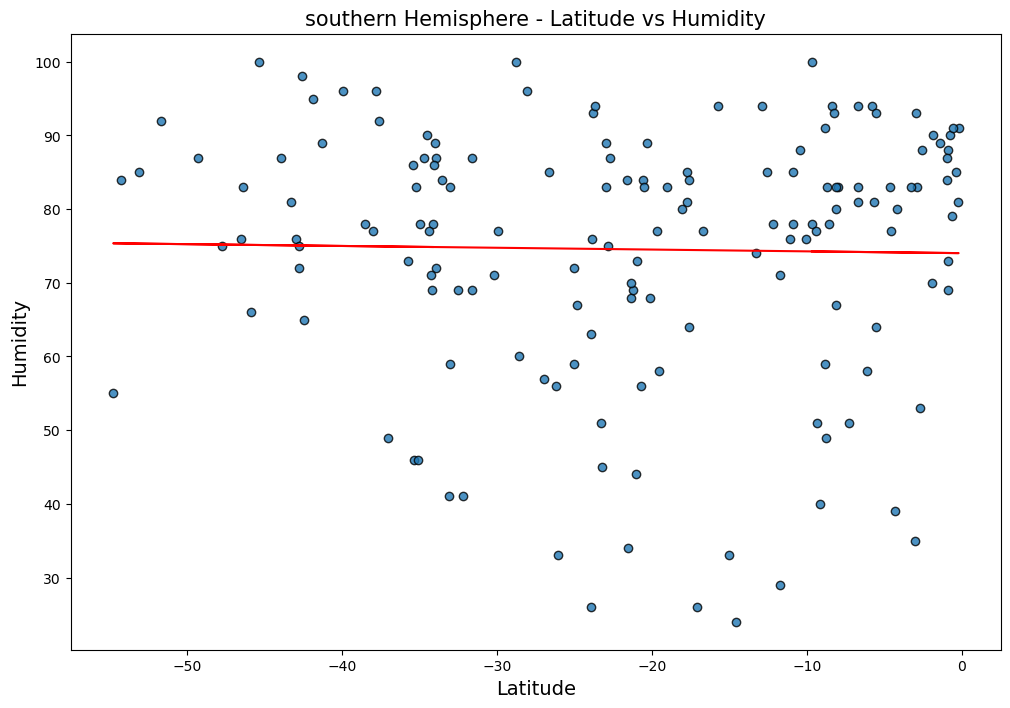

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], x_label="Latitude", y_label="Humidity", hemisphere = "southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The data show no relationship between the humidity and latitude for both the Northern and Southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004724351103112071
The correlation between both factors is -0.07


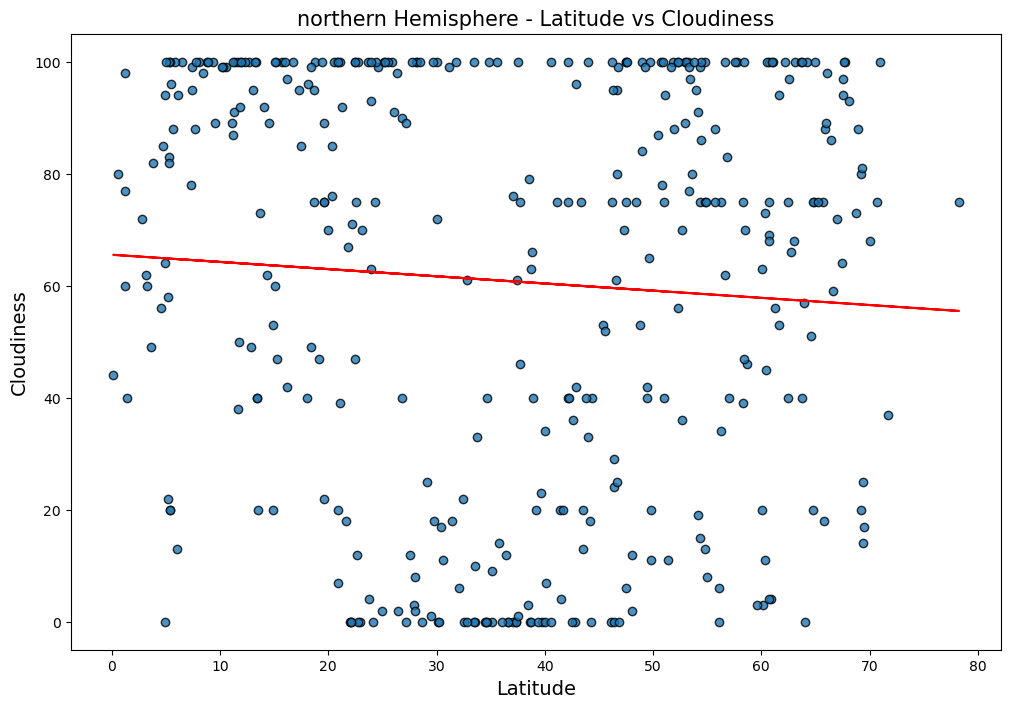

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], x_label="Latitude", y_label="Cloudiness", hemisphere = "northern")

The r-squared is: 0.00012377347245751659
The correlation between both factors is -0.01


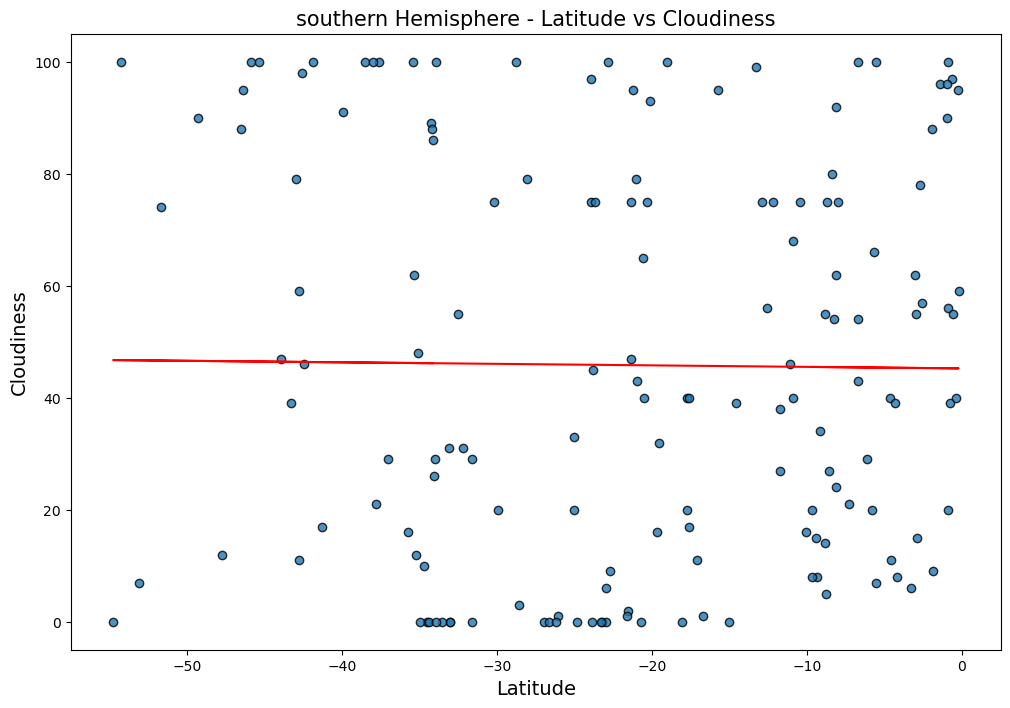

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], x_label="Latitude", y_label="Cloudiness", hemisphere = "southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The data shows no relationship between cloudiness and latitude for both the Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.061407579427310274
The correlation between both factors is -0.25


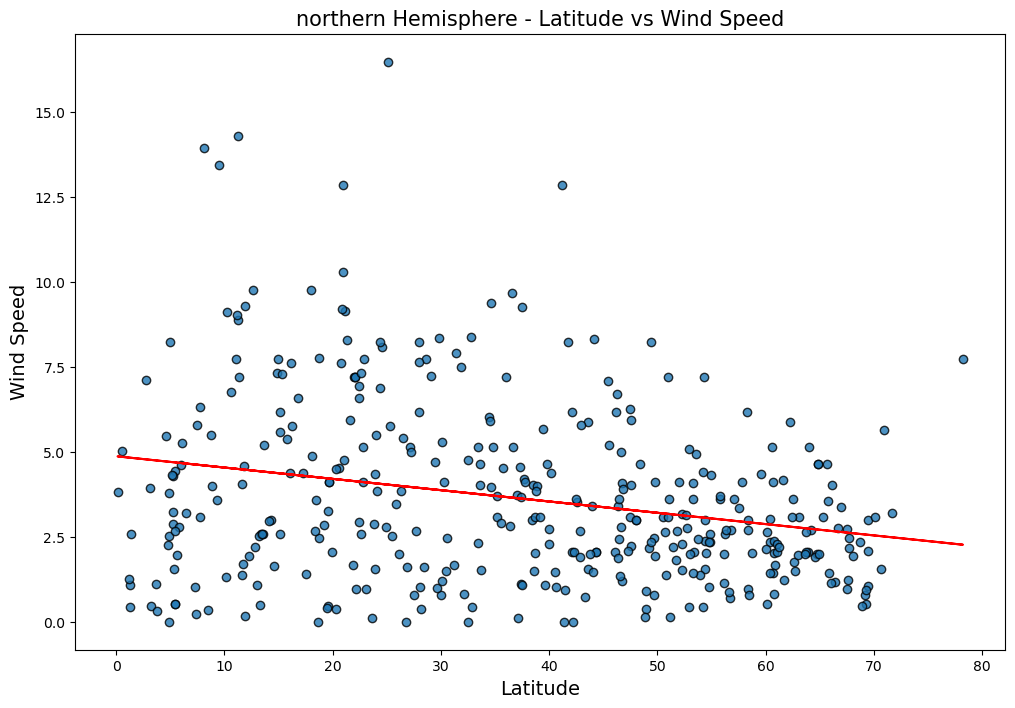

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], x_label="Latitude", y_label="Wind Speed", hemisphere = "northern")

The r-squared is: 0.0045419353702244826
The correlation between both factors is 0.07


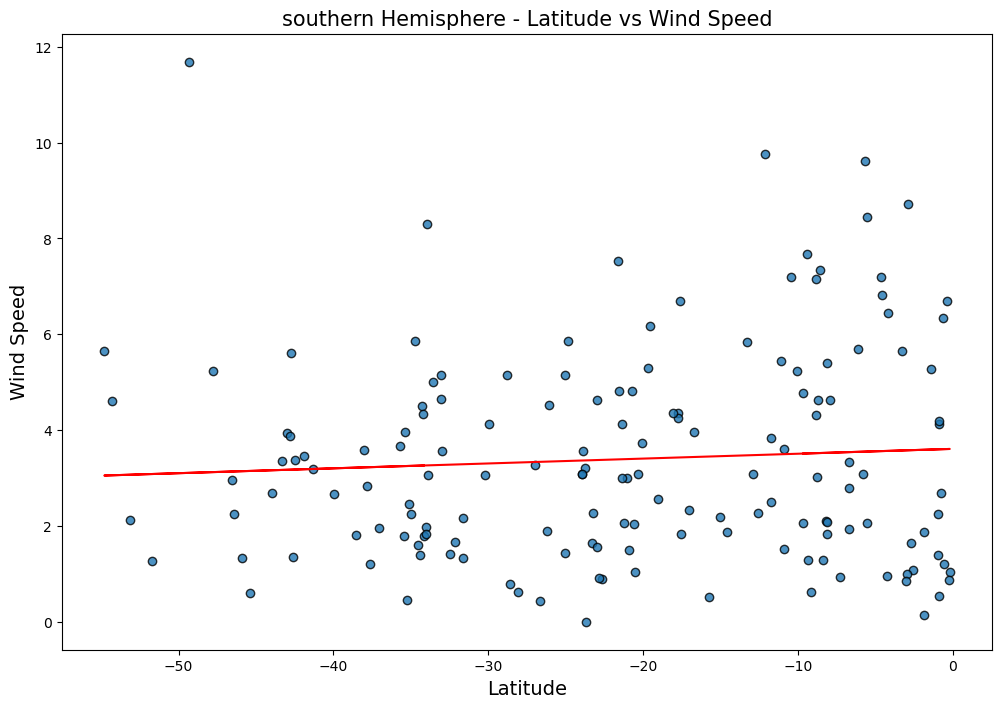

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], x_label="Latitude", y_label="Wind Speed", hemisphere = "southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The data shows no relationship between wind speed and latitude for both the Northern and Southern hemispheres.